!ls

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from celluloid import Camera
import os

files = np.array(os.listdir("data/Synapse/train_npz"))
unique_synapse = np.unique([file.split('_')[0] for file in files])
print("Unique cases in Synapse data:", len(unique_synapse),"\n", unique_synapse)


def case_sort_slices(filenames, case):
    file = ""
    boolean_ = [filexxx.split('_')[0] == case for filexxx in filenames]
    case_filenames = filenames[boolean_]
    args = np.argsort([int(file[-7:-4:]) for file in case_filenames])
    case_filenames = np.array(case_filenames)

    return case_filenames[args]

# print("Case0005 has", len(files_case_005), "slices.")

Unique cases in Synapse data: 18 
 ['case0005' 'case0006' 'case0007' 'case0009' 'case0010' 'case0021'
 'case0023' 'case0024' 'case0026' 'case0027' 'case0028' 'case0030'
 'case0031' 'case0033' 'case0034' 'case0037' 'case0039' 'case0040']
Case0005 has 117 slices.


In [87]:
def makeAnimation(case, data_path, files_):
    t = 1

    cmap = {
        0: [0, 0, 0, t],
        1: [0, 0, 1, t],
        2: [0, 1, 0, t],
        3: [1, 0, 0, t],
        4: [0, 1, 1, t],
        5: [0.5, 0, 0.5, t],
        6: [1, 1, 0, t],
        7: [1, 0.5, 0, t],
        8: [0.5, 0.5, 0.5, t]
           }

    labels = {
        0: 'background',
        1: 'aorta',
        2: 'gallbladder',
        3: 'left kidney',
        4: 'right kidney',
        5: 'liver',
        6: 'pancreas',
        7: 'spleen',
        8: 'stomach'
    }

    file_names = case_sort_slices(files_, case)

    fig, axes = plt.subplots(1, 2, figsize=(15, 15))

    camera = Camera(fig)
    for i in range(len(file_names)):
        file = file_names[i]
        data = np.load(data_path+file)
        im1 = axes[0].imshow(data['image'], cmap='gray', animated=True)
        axes[0].text(0.5, 1, 'image: ' + " ".join(file.split('.')[0].split('_')), transform=axes[0].transAxes)
        axes[0].axis('off')

        arrayShow = np.array([[cmap[i] for i in j] for j in data['label']])
        axes[1].imshow(arrayShow, animated=True)
        axes[1].set_title('label')
        axes[1].axis('off')
        patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]
        axes[1].legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

        camera.snap()

    plt.close()

    ani = camera.animate(interval=60, blit=True)
    output_file = case+".mp4"
    ani.save('anims/'+output_file, fps=1000/50)


for casexx in unique_synapse:
    makeAnimation(casexx, 'data/Synapse/train_npz/', files)

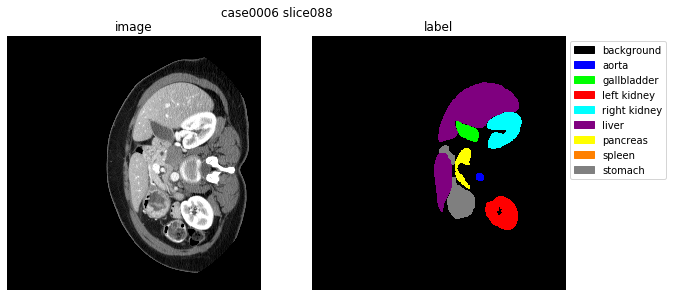

In [14]:
for i, file in enumerate(files_case_006):
    if i == 90: 
        data = np.load('data/Synapse/train_npz/'+file)
        fig, axes = plt.subplots(1, 2, figsize=(10, 10))
        fig.suptitle(" ".join(file.split('.')[0].split('_')))
        fig.subplots_adjust(top=1.4)
        axes[0].imshow(data['image'], cmap='gray')
        axes[0].set_title('image')
        axes[0].axis('off')
        arrayShow = np.array([[cmap[i] for i in j] for j in data['label']])    
        #print(arrayShow)
        axes[1].imshow(arrayShow)
        axes[1].set_title('label')
        axes[1].axis('off')
        patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]
        axes[1].legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

In [144]:
folders = ["Dataset/Fluorescent/", "Dataset/Brightfield/", "Dataset/Ground_Truth/"]

files = np.array(os.listdir(folders[0]))
fluo_train = np.load(folders[0]+files[0])
files = np.array(os.listdir(folders[1]))
bright_train = np.load(folders[1]+files[0])
files = np.array(os.listdir(folders[2]))
ground_train = np.load(folders[2]+files[0])

In [147]:
bright_train.shape

(504, 1080, 1080, 1)

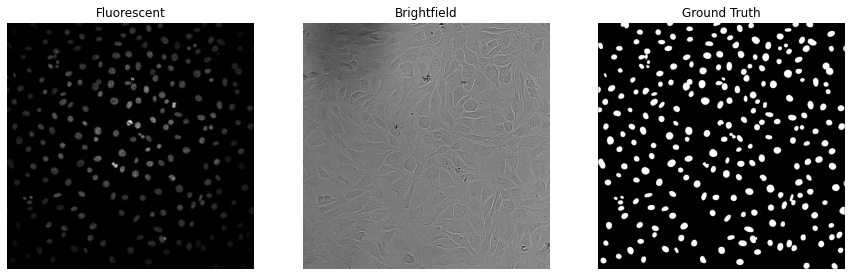

In [150]:
fig, axes = plt..(1,3, figsize=(15,15))
#fig.suptitle(" ".join(file.split('.')[0].split('_')))
#fig.subplots_adjust(top=1.4)
axes[0].imshow(fluo_train[0,:,:], cmap='gray')
axes[0].set_title("Fluorescent")
axes[0].axis('off')
axes[1].imshow(bright_train[0,:,:], cmap='gray')
axes[1].set_title("Brightfield")
axes[1].axis('off')
axes[2].imshow(ground_train[0,:,:], cmap='gray')
axes[2].set_title("Ground Truth")
axes[2].axis('off')

plt.show()
